In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale = 1)
color = sns.color_palette("tab10", 10)[0]

In [7]:
data = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/output/10 dec.csv')
sv = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/seavision/lists-Reefers-2022-11-11_04-40.csv')

In [11]:
df = data.merge(sv, on='MMSI', how='left')

In [14]:
sum(df['Vessel Type'] == '30-Fishing')

450

In [17]:
df.loc[df['Vessel Type'] == '30-Fishing','Length'].mean()

35.2

In [18]:
df.loc[df['Vessel Type'] != '30-Fishing','Length'].mean()

99.79537237888648

In [19]:
df.loc[df['Vessel Type'] == '30-Fishing','Gross Tonnage'].mean()

1233.2387543252596

In [20]:
df.loc[df['Vessel Type'] != '30-Fishing','Gross Tonnage'].mean()

7923.826959847036

In [22]:
df.loc[df['Vessel Type'] == '30-Fishing','Flag_x'].value_counts()

United States Of America       61
Russia                         50
Japan                          49
Turkey                         34
China, People's Republic Of    29
Indonesia                      26
Canada                          7
Chinese Taipei                  7
Philippines                     5
Norway                          4
Korea, South                    2
Chile                           2
Spain                           2
Oman                            2
Thailand                        1
Panama                          1
Tunisia                         1
Iceland                         1
Croatia                         1
Peru                            1
Ukraine                         1
Portugal                        1
Ghana                           1
Name: Flag_x, dtype: int64

In [23]:
df.loc[df['Vessel Type'] != '30-Fishing','Flag_x'].value_counts()

Panama                         245
Russia                         166
China, People's Republic Of     90
Bahamas                         86
Norway                          74
                              ... 
Malaysia                         1
Madagascar                       1
Antigua & Barbuda                1
Australia                        1
Congo (Democratic Republic)      1
Name: Flag_x, Length: 61, dtype: int64

In [24]:
loitering = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/loitering.csv')
encounter = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/encounters.csv')

/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_35550/1440494796.py:1: DtypeWarning: Columns (11,12,13,14,15,42,43,44,47,52) have mixed types. Specify dtype option on import or set low_memory=False.
  loitering = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/loitering.csv')
/var/folders/8z/3jxkd1111yv6m0gf9g9kqmdr0000gn/T/ipykernel_35550/1440494796.py:2: DtypeWarning: Columns (43,45,48,55) have mixed types. Specify dtype option on import or set low_memory=False.
  encounter = pd.read_csv('/Users/sebastiandodt/OneDrive/Uni/Carnegie Mellon University/Modules/2022 Fall/Systems Project/Coding/90739-iuu-systems-project/pipeline/data/unified/encounters.csv')


In [33]:
fishing_boats = df.loc[df['Vessel Type'] == '30-Fishing','MMSI']
loitering.loc[~(loitering['vessel.mmsi'].isin(fishing_boats)),'id'].nunique()

208011

In [28]:
fishing_boats = df.loc[df['Vessel Type'] == '30-Fishing','MMSI']
encounter.loc[~(encounter['vessel.mmsi'].isin(fishing_boats)),'id'].nunique()

48812

In [31]:
summe = loitering.loc[~(loitering['vessel.mmsi'].isin(fishing_boats)),'id'].nunique() + encounter.loc[~(encounter['vessel.mmsi'].isin(fishing_boats)),'id'].nunique()
loitering.loc[~(loitering['vessel.mmsi'].isin(fishing_boats)),'id'].nunique() / summe

0.809939140964789

In [57]:
yong_hang = pd.concat([loitering.loc[loitering['vessel.mmsi']==357172000,:],encounter.loc[encounter['vessel.mmsi']==357172000,:]], ignore_index=True)

<Figure size 640x480 with 0 Axes>

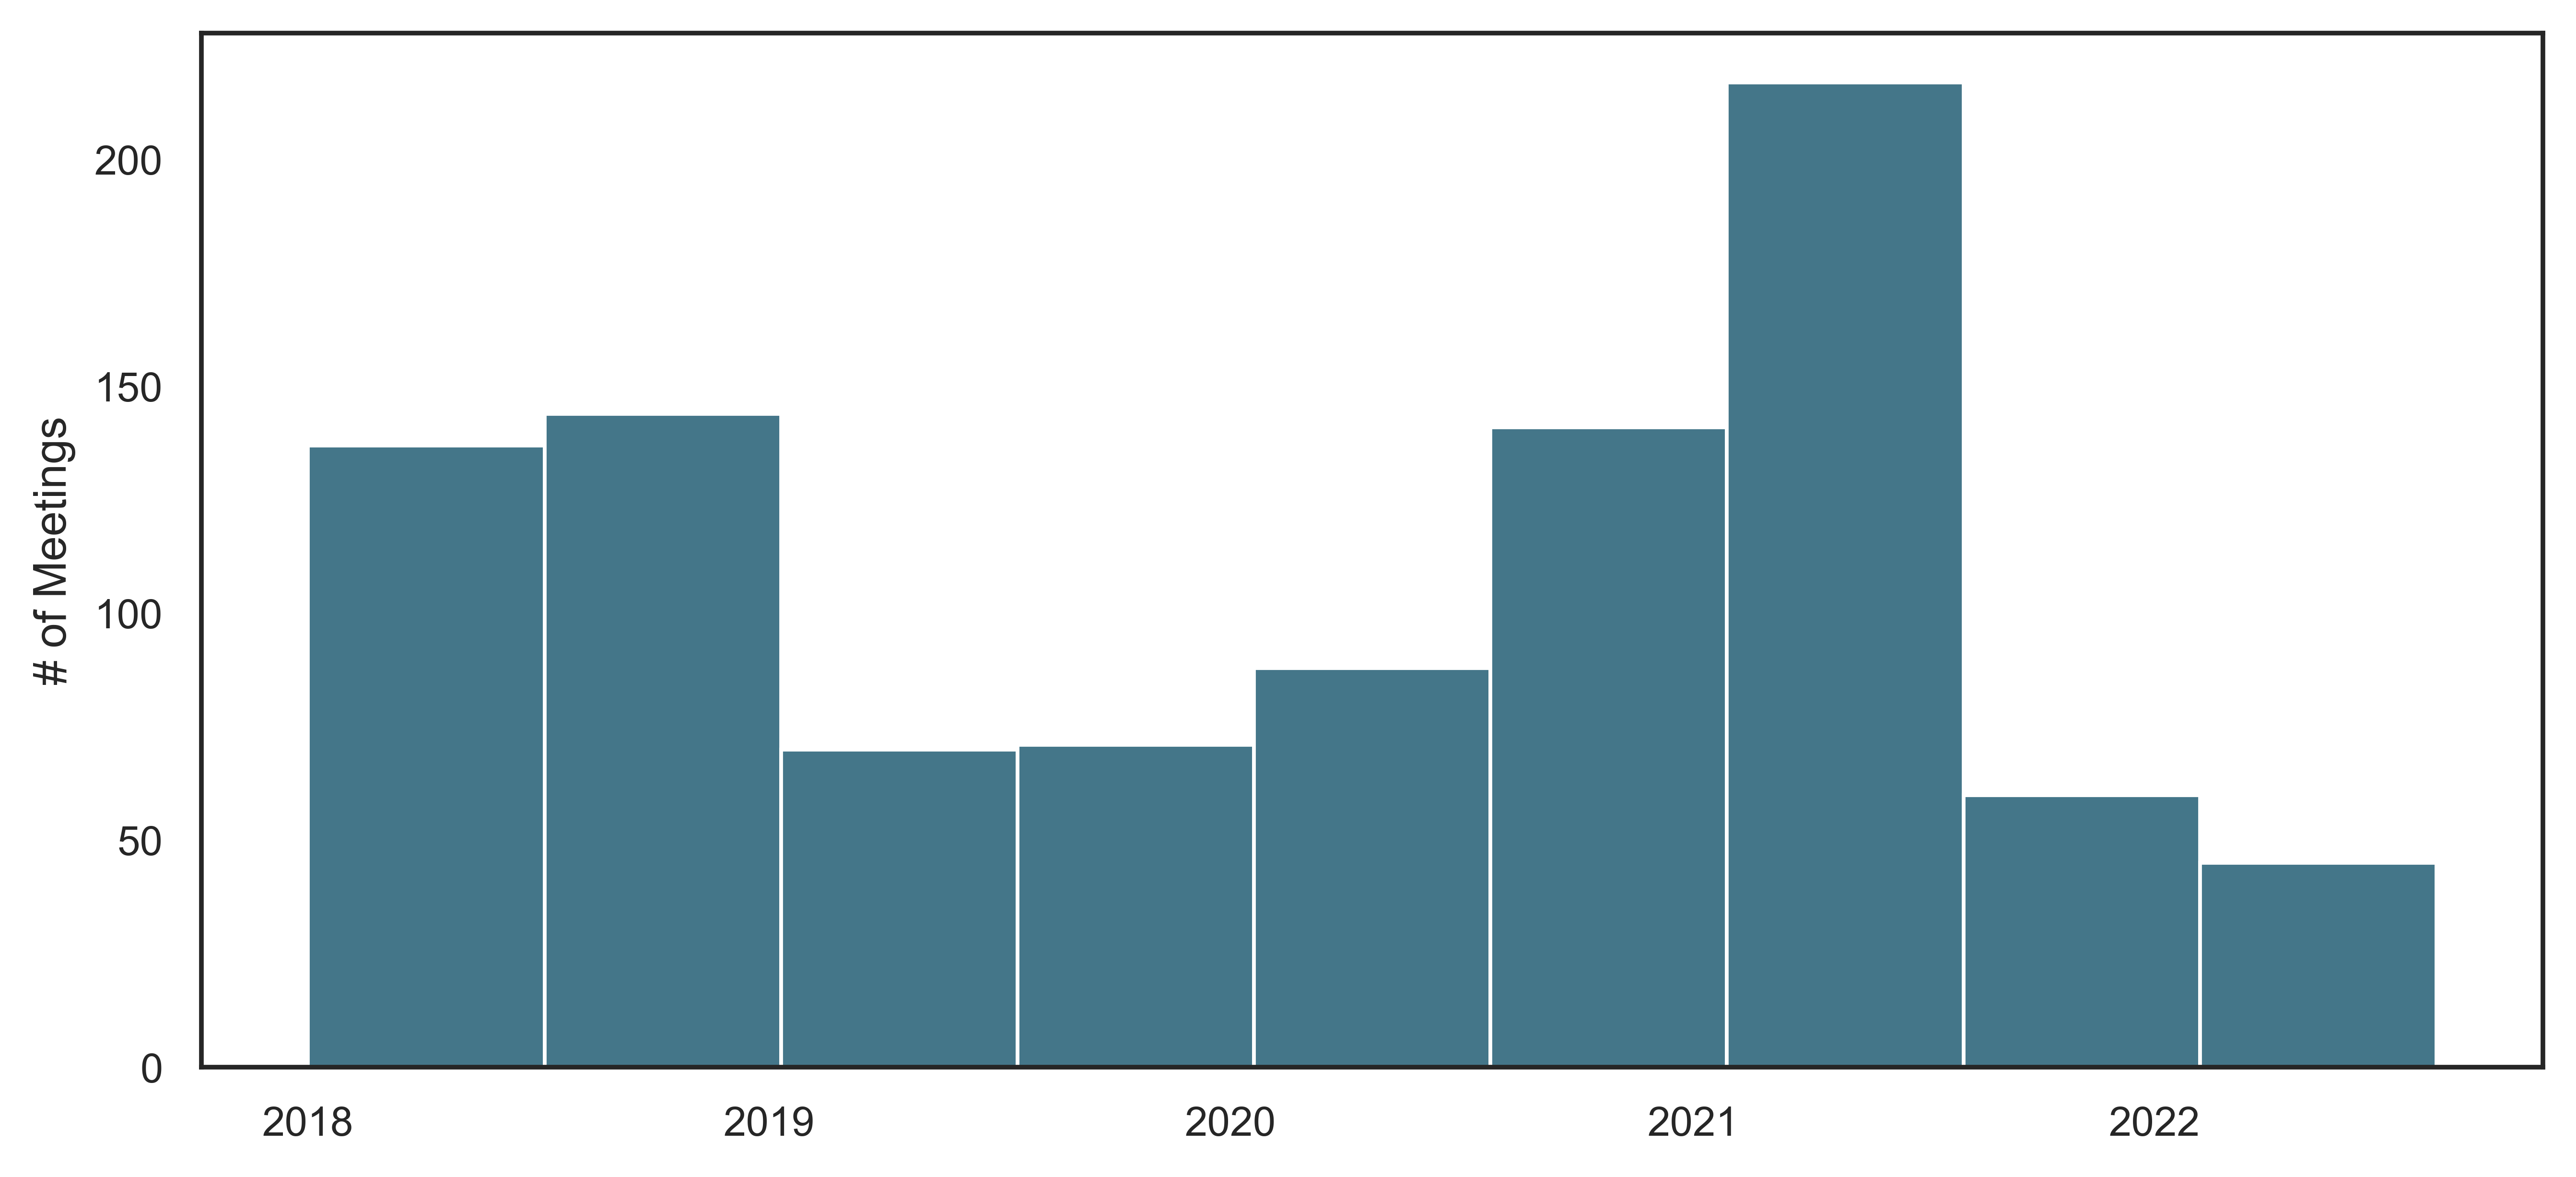

In [80]:
yong_hang = pd.concat([loitering.loc[loitering['vessel.mmsi']==351960000,:],encounter.loc[encounter['vessel.mmsi']==351960000,:]], ignore_index=True)
yong_hang = yong_hang.loc[yong_hang['start'] >= '2018-01-01',:]
plt.clf()
figure(figsize=(9, 4), dpi=700)
yong_hang['start'] = pd.to_datetime(yong_hang['start'])
plt.rcParams['savefig.transparent'] = True
sns.histplot(yong_hang, x='start', bins=9, color='#054862')
plt.xlabel('')
plt.ylabel('# of Meetings')
plt.savefig('ming_hang_dashboard.png',dpi=700)


In [76]:
len(set(loitering['vessel.mmsi']).union(set(encounter['vessel.mmsi'])))

2101